# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [2]:
import sys

import numpy
from sklearn.impute import SimpleImputer
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures,
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [3]:
### Your code here
bikeset= pd.read_csv('SeoulBikeData.csv')
bikeset.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


In [4]:
bikeset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

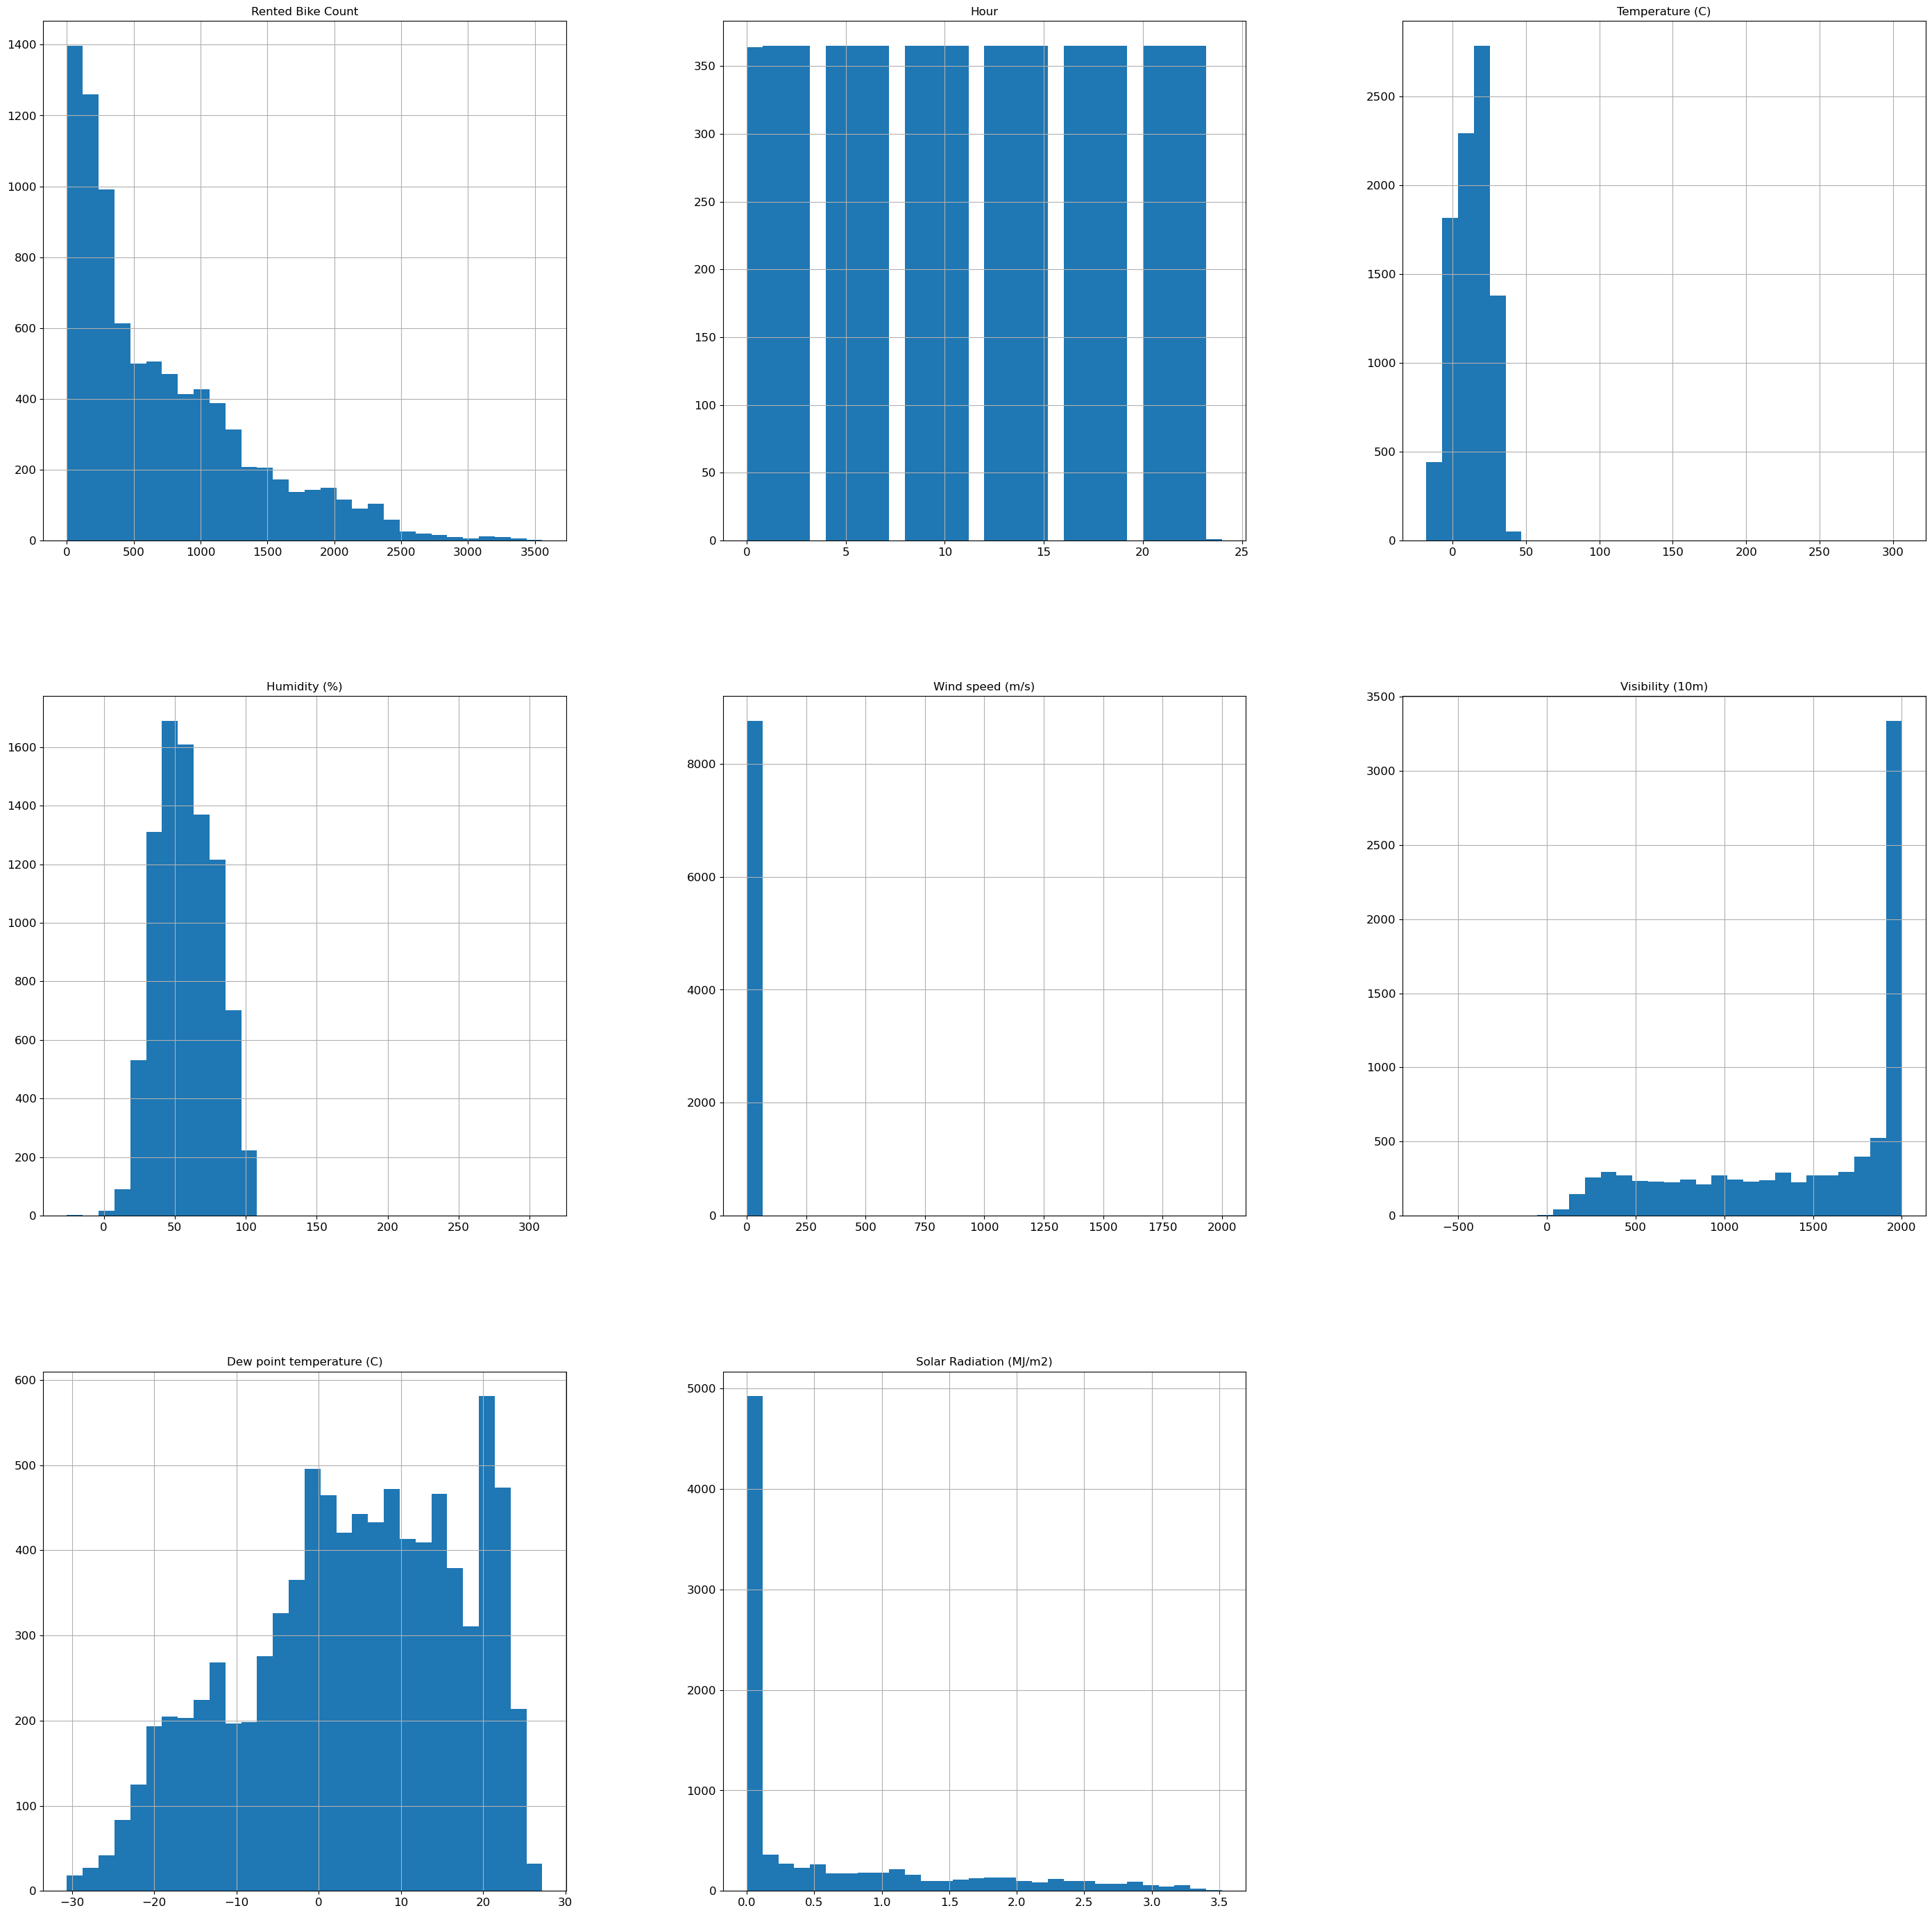

In [5]:
### Your code here
bikeset.hist(bins=30,figsize=(35,35))
plt.show()

### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [6]:
### Your code here
bikeset = bikeset.loc[bikeset["Functioning Day"] == "Yes"]
bikeset = bikeset.loc[bikeset["Rented Bike Count"] != 0]
bikeset.drop(columns=["Functioning Day"], inplace=True)
bikeset.count()

Date                         8465
Rented Bike Count            8465
Hour                         8465
Temperature (C)              8465
Humidity (%)                 8465
Wind speed (m/s)             8464
Visibility (10m)             8465
Dew point temperature (C)    8464
Solar Radiation (MJ/m2)      8465
Rainfall(mm)                 8463
Snowfall (cm)                8465
Seasons                      8465
Holiday                      8465
dtype: int64

### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [7]:
### Your code here
bikeset.loc[bikeset["Holiday"] == "Holiday","Holiday"] = 0
bikeset.loc[bikeset["Holiday"] == "No Holiday","Holiday"] = 1
bikeset.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,1


The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [8]:
### Your code here
bikeset.loc[bikeset["Seasons"] == "Winter","Winter"] = 1
bikeset.loc[bikeset["Seasons"] != "Winter","Winter"] = 0
bikeset.loc[bikeset["Seasons"] == "Spring","Spring"] = 1
bikeset.loc[bikeset["Seasons"] != "Spring","Spring"] = 0
bikeset.loc[bikeset["Seasons"] == "Summer","Summer"] = 1
bikeset.loc[bikeset["Seasons"] != "Summer","Summer"] = 0
bikeset.loc[bikeset["Seasons"] == "Autumn","Autumn"] = 1
bikeset.loc[bikeset["Seasons"] != "Autumn","Autumn"] = 0
bikeset.drop('Seasons',axis=1,inplace=True)
bikeset.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,1,1.0,0.0,0.0,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,1,1.0,0.0,0.0,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,1,1.0,0.0,0.0,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,1,1.0,0.0,0.0,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,1,1.0,0.0,0.0,0.0


It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [9]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
bikeset['Weekday'] = bikeset['Date'].transform(date_is_weekday)
bikeset.drop(['Date'], axis=1, inplace=True)
bikeset.head()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,1,1.0,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,1,1.0,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,1,1.0,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,1,1.0,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,1,1.0,0.0,0.0,0.0,1


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [10]:
### Your code here

def is_func(day):
    return 1 if day == 'Yes' else 0

def to_Nan(value):
    return value if value is not None else np.nan
bikeset[0:] = bikeset.iloc[0:].apply(to_Nan)
bikeset = bikeset.apply(lambda x: pd.to_numeric(x, errors='coerce') )
bikeset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   int64  
 4   Wind speed (m/s)           8464 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8464 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8440 non-null   float64
 9   Snowfall (cm)              8442 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Winter                     8465 non-null   float64
 12  Spring                     8465 non-null   float64
 13  Summer                     8465 non-null   float

## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

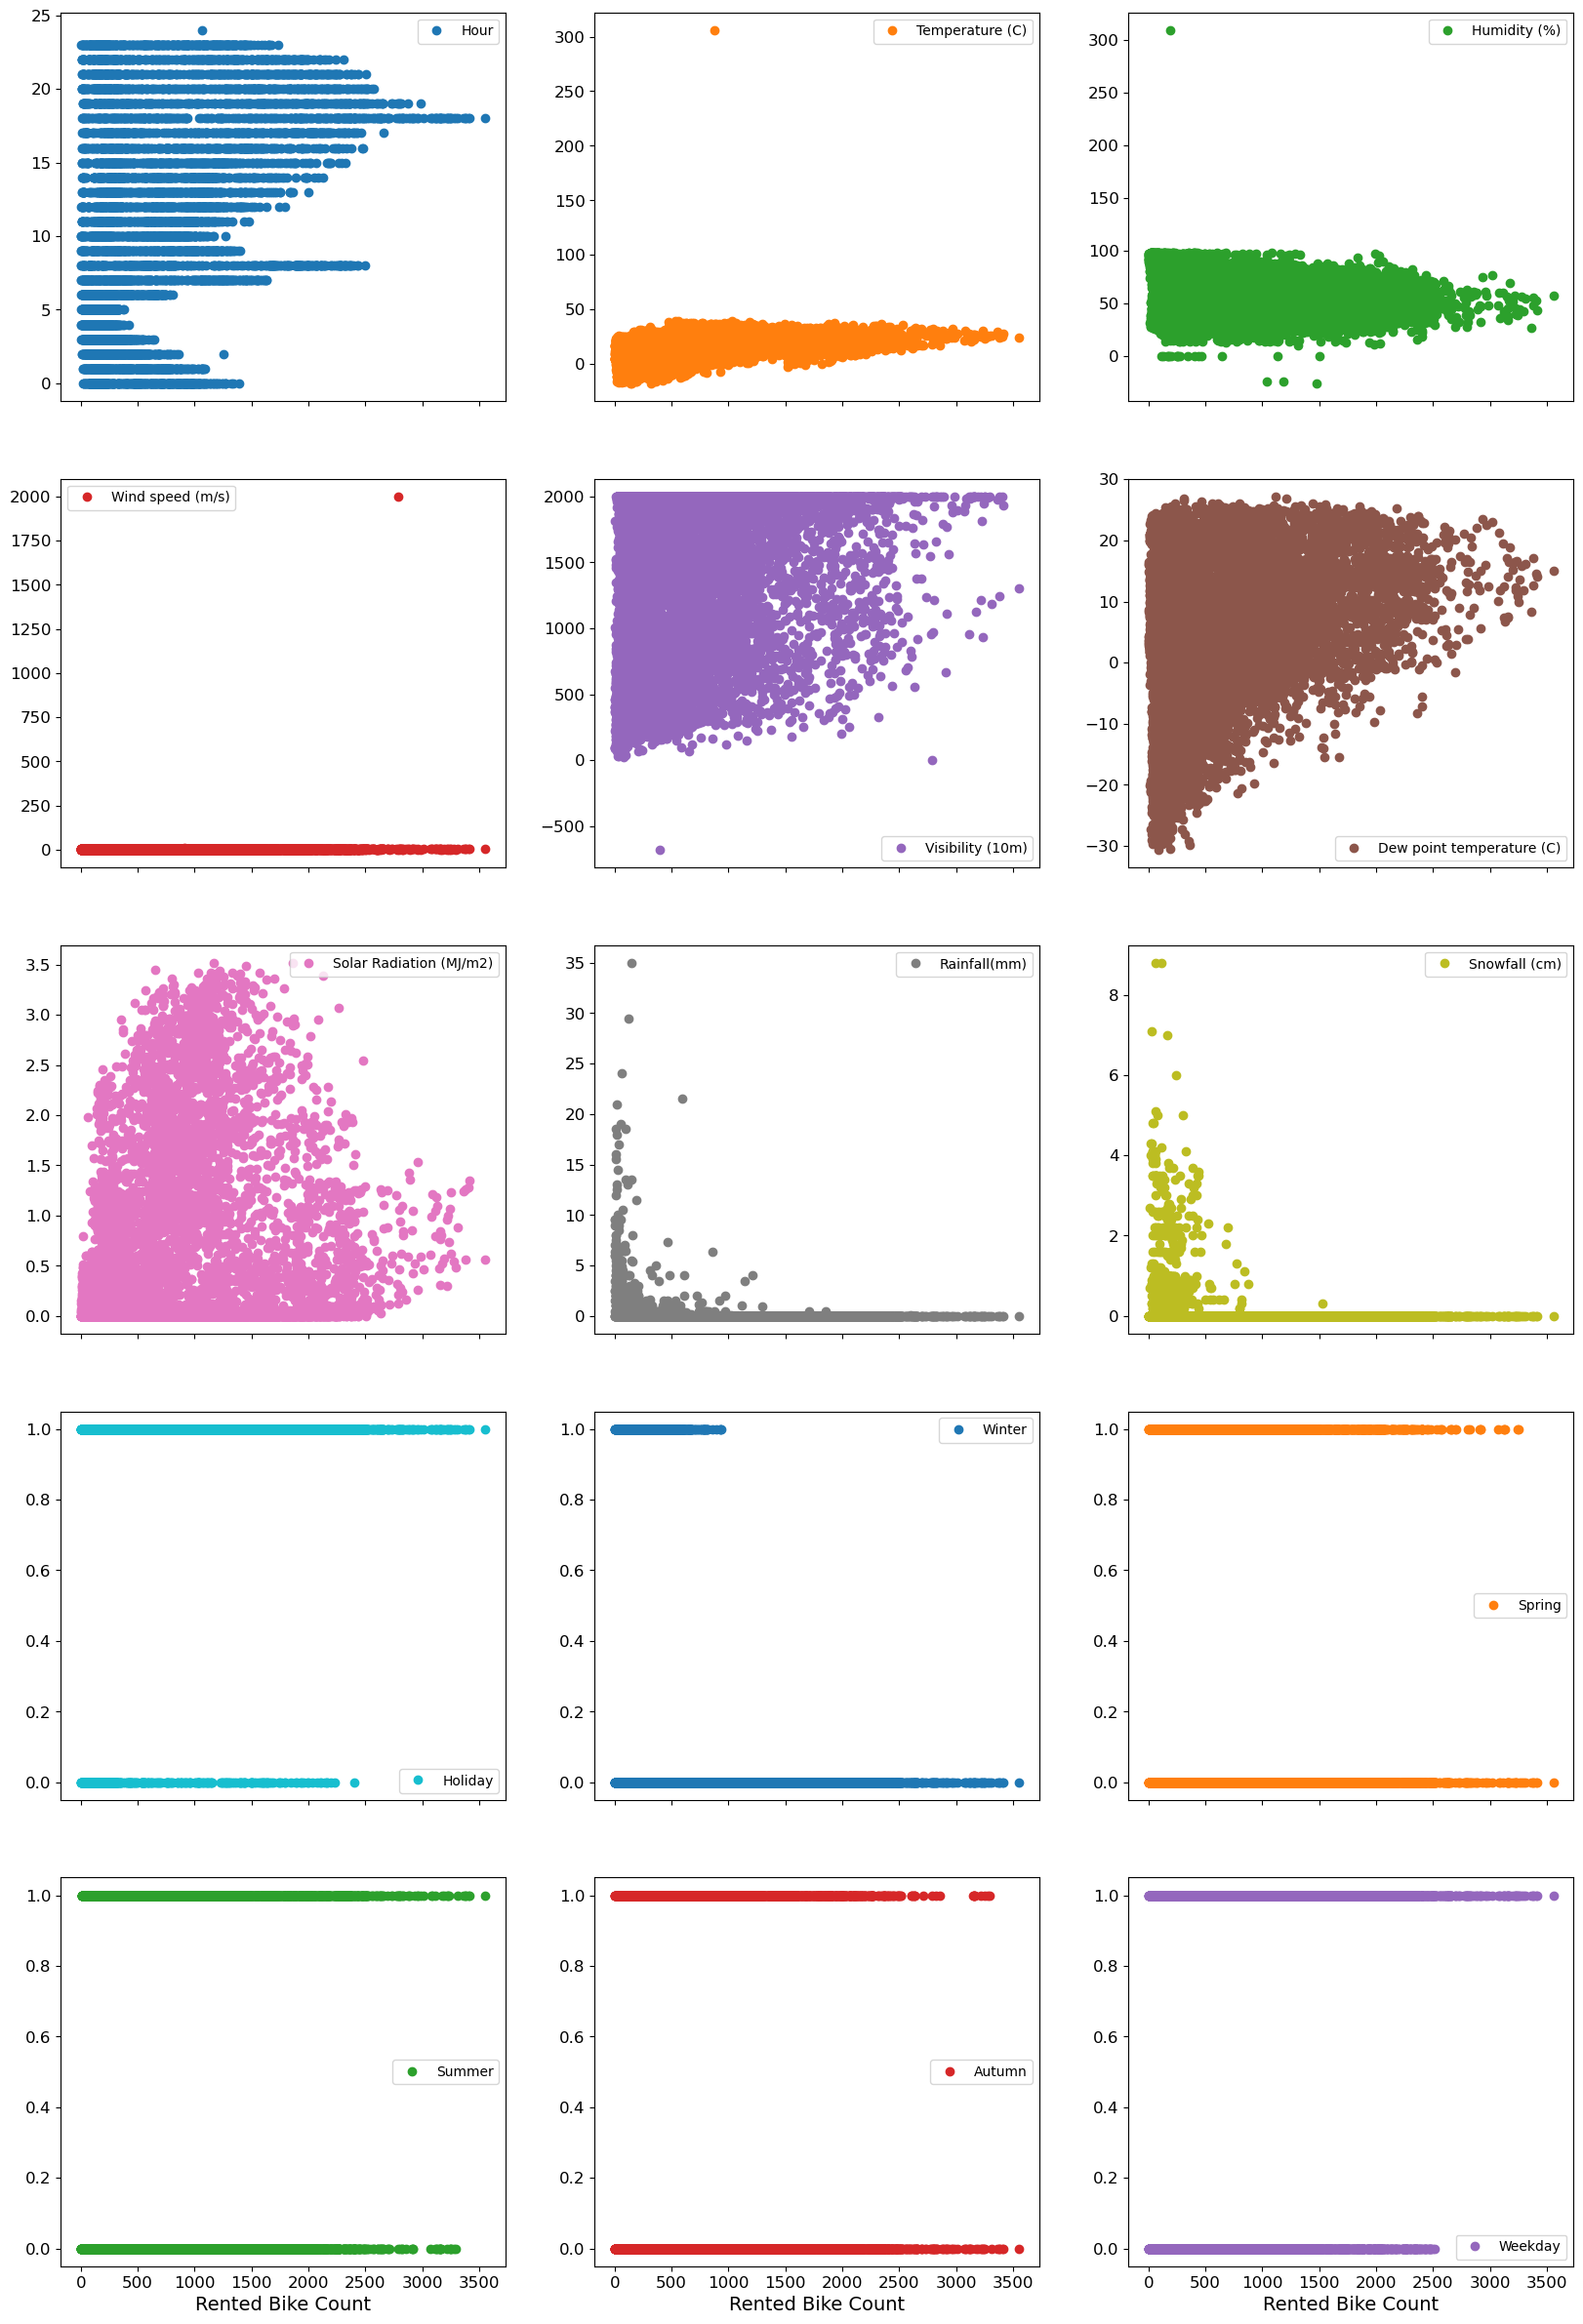

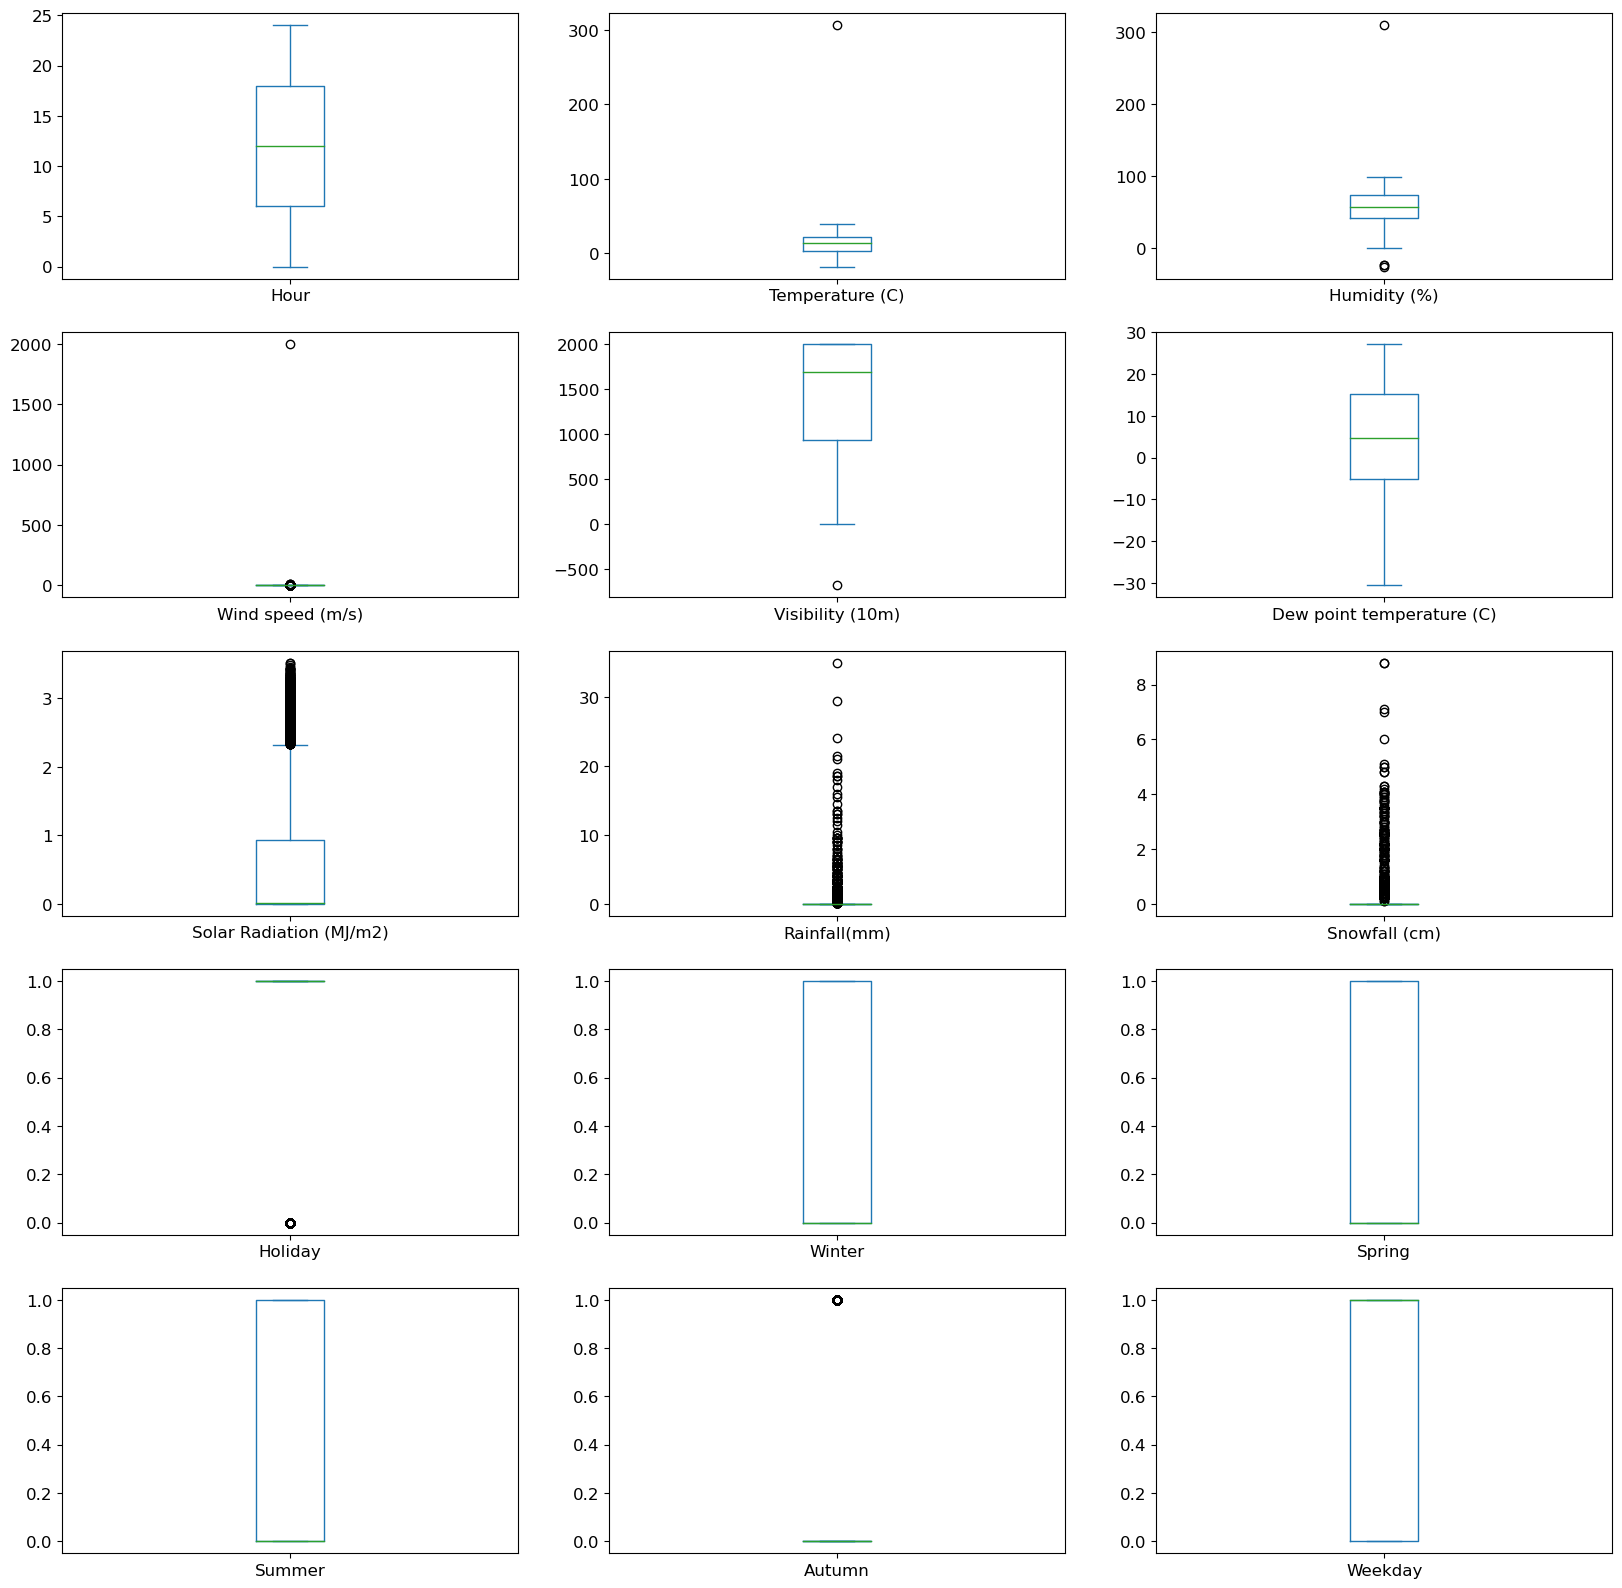

Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              1
Visibility (10m)              0
Dew point temperature (C)     1
Solar Radiation (MJ/m2)       0
Rainfall(mm)                 25
Snowfall (cm)                23
Holiday                       0
Winter                        0
Spring                        0
Summer                        0
Autumn                        0
Weekday                       0
dtype: int64


In [11]:
### Your code here
cols = bikeset.columns.tolist()
cols.remove('Rented Bike Count')

# scatter plot
bikeset.plot(kind="line", x="Rented Bike Count", y=cols, subplots=True, sharex=True, ls="none", marker="o",figsize=(20,30),layout=(5, 3))

# box plot
bikeset.plot(kind="box", x="Rented Bike Count", y=cols, subplots=True, sharex=True,figsize=(20,20),layout=(5, 3))
plt.show()

# show the non-numerical entries
print(np.sum(bikeset.isna()))

In [11]:
### Your summary sentence about problematic entries
#The provided graph depicting the relationship between temperature and bike rentals contains data points for temperature,humidity, wind speed, and visibility that fall outside the usual or anticipated range.

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [12]:
### Your code here
bikeset.loc[bikeset["Temperature (C)"] > 100,"Temperature (C)"] = np.nan
bikeset.loc[bikeset["Humidity (%)"] > 100,"Humidity (%)"] = np.nan
bikeset.loc[bikeset["Humidity (%)"] < 0,"Humidity (%)"] = np.nan
bikeset.loc[bikeset["Wind speed (m/s)"] > 20,"Wind speed (m/s)"] = np.nan
bikeset.loc[bikeset["Visibility (10m)"] < 0,"Visibility (10m)"] = np.nan
pipe = Pipeline([
('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
,('std_scaler',StandardScaler())
# ,('linear_regression', LinearRegression())
])
bikeset.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn,Weekday
count,8465.000000,8465.000000,8464.000000,8461.000000,8463.000000,8464.000000,8464.000000,8465.000000,8440.000000,8442.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.509864,12.768951,58.161328,1.726078,1433.726607,3.945558,0.567868,0.149562,0.077896,0.951802,0.255168,0.255168,0.260839,0.228825,0.711636
std,642.351166,6.921101,12.103538,20.478908,1.034324,609.199826,13.243081,0.868245,1.127177,0.444649,0.214198,0.435982,0.435982,0.439118,0.420101,0.453028
min,2.000000,0.000000,-17.800000,0.000000,0.000000,1.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1689.500000,4.700000,0.010000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,3556.000000,24.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [13]:
### Your code here
transformed = pd.DataFrame(
    data=pipe.fit_transform(bikeset)
    ,columns=bikeset.columns
    ,index=bikeset.index
)
corre= transformed.corr()
corre['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature (C)              0.562774
Hour                         0.425460
Dew point temperature (C)    0.400234
Summer                       0.282001
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.210937
Autumn                       0.165333
Wind speed (m/s)             0.125151
Holiday                      0.070070
Weekday                      0.046360
Spring                       0.015580
Rainfall(mm)                -0.128626
Snowfall (cm)               -0.151611
Humidity (%)                -0.201731
Winter                      -0.458920
Name: Rented Bike Count, dtype: float64

In [14]:
### Your written answer here
#To prevent imputation, scaling, or pre-processing on the entire dataset initially, it is recommended to employ a pipeline. This approach ensures that these steps are exclusively applied to the training data, irrespective of the chosen cross-validation method.

To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

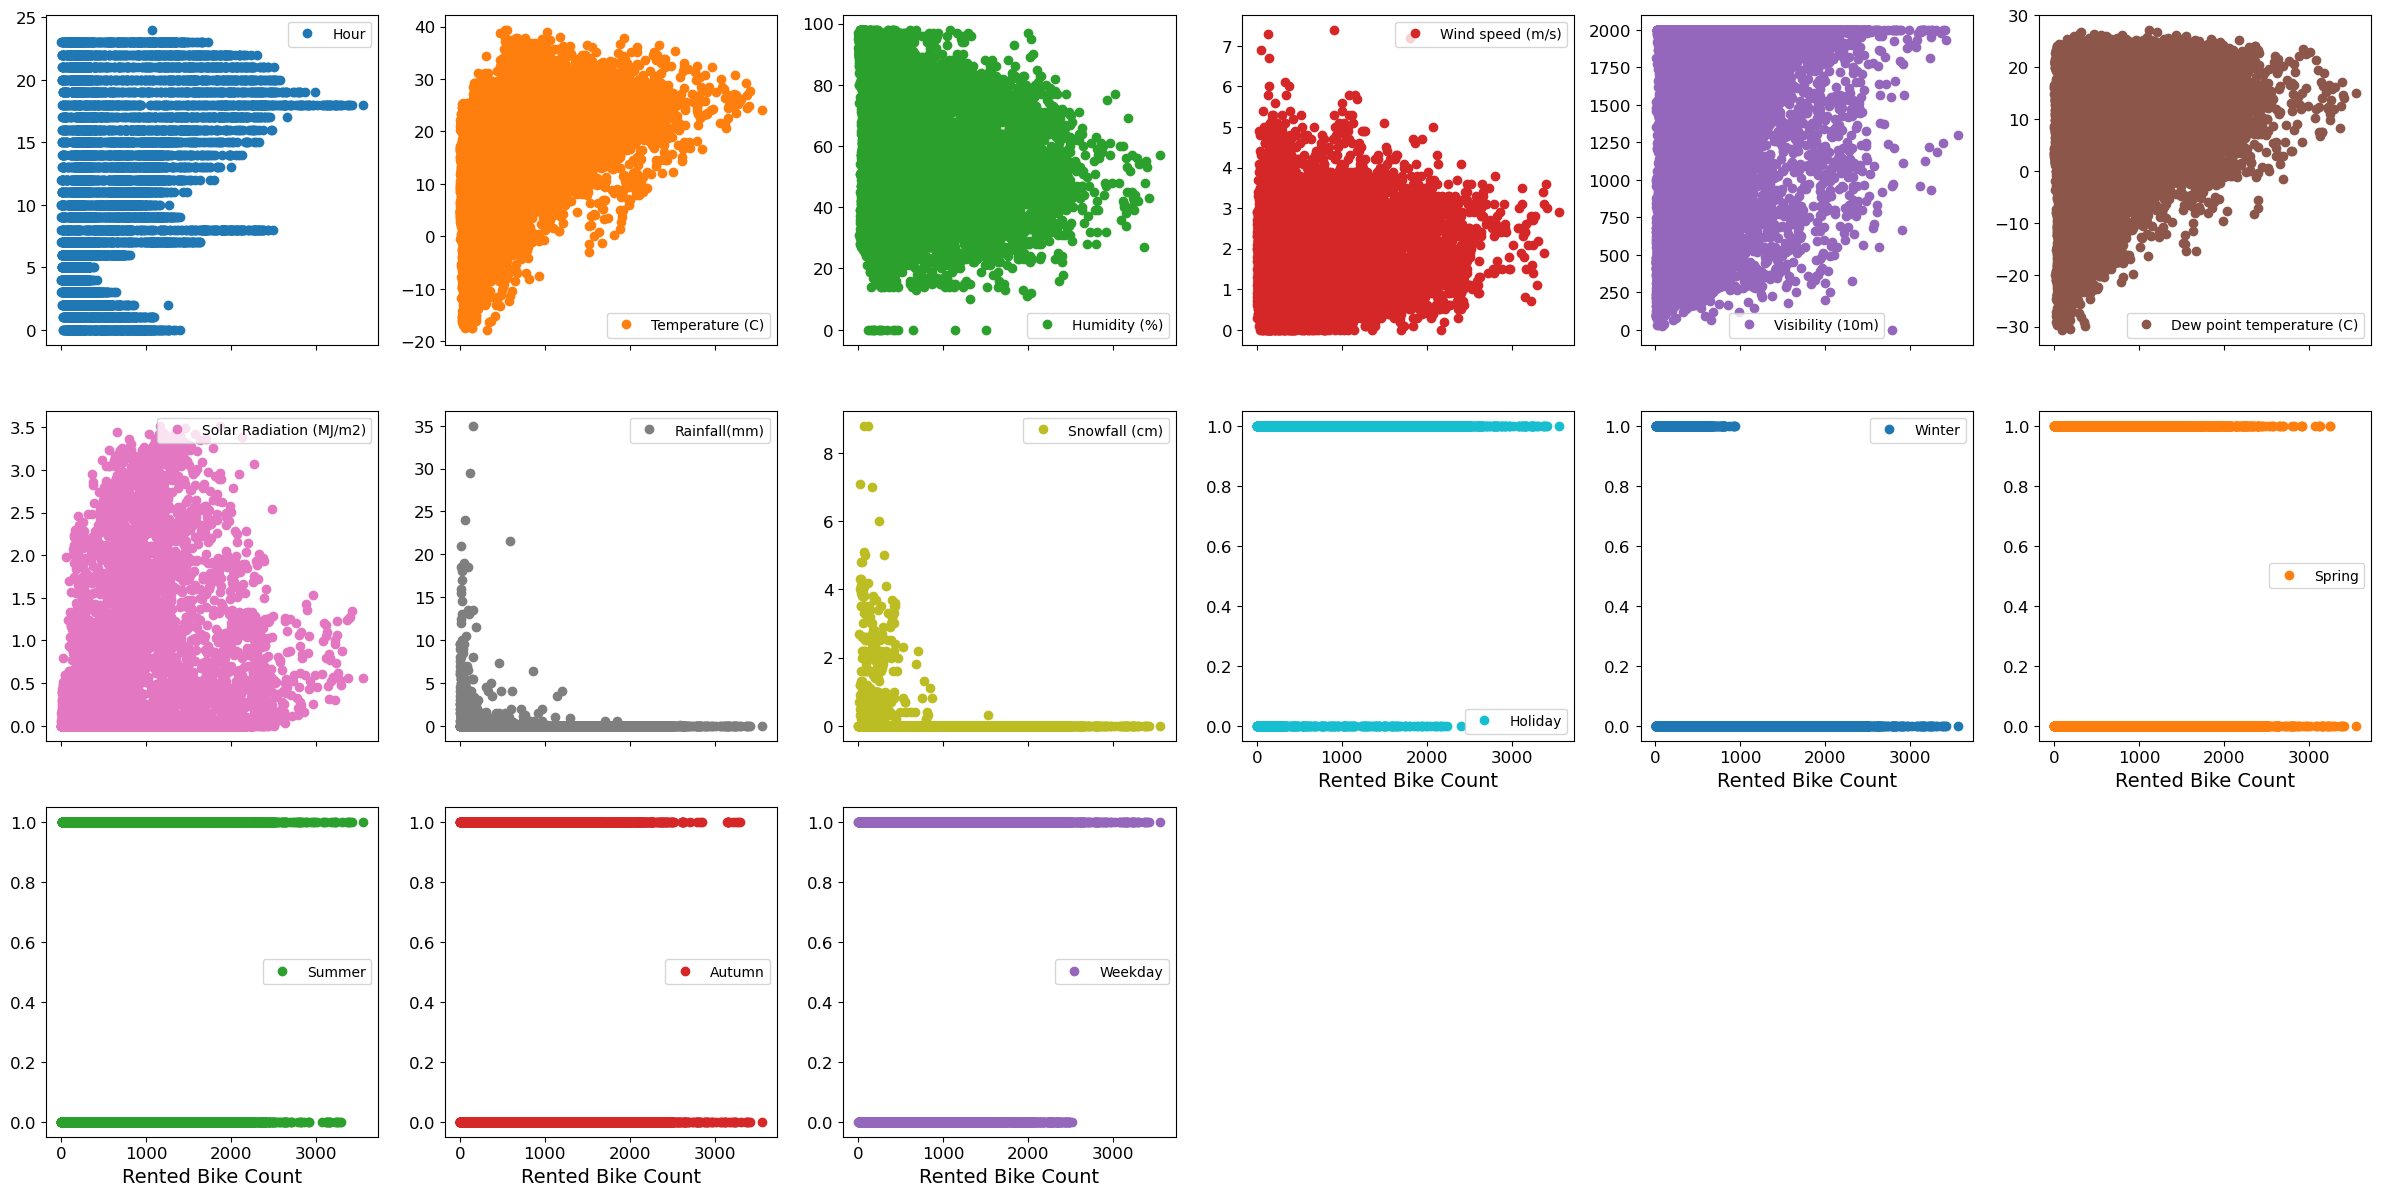

Rented Bike Count            1.000000
Temperature (C)              0.562774
Hour                         0.425460
Dew point temperature (C)    0.400248
Summer                       0.282001
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.210968
Autumn                       0.165333
Wind speed (m/s)             0.125295
Holiday                      0.070070
Weekday                      0.046360
Spring                       0.015580
Rainfall(mm)                -0.129170
Snowfall (cm)               -0.152261
Humidity (%)                -0.201755
Winter                      -0.458920
Name: Rented Bike Count, dtype: float64

In [20]:
### Your code here
col = bikeset.columns.tolist()
col.remove('Rented Bike Count')
bikeset.plot(kind="line", x="Rented Bike Count", y=col, subplots=True, sharex=True,ls="none", marker="o",figsize=(30,30),layout=(6,6))
plt.show()
corre = bikeset.corr()
corre['Rented Bike Count'].sort_values(ascending=False)

In [16]:
### Your written answers here
#By analyzing the correlation statistic and scatter plot, it becomes apparent that temperature, hours, and winter are the variables that display the most significant correlations with bike rentals. Specifically, temperature and hours demonstrate a positive correlation, whereas winter exhibits a negative correlation with bike rentals. These three factors are therefore considered the most influential in determining bike rental patterns.

## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [14]:
### Your code here
x_train, x_test, y_train, y_test = train_test_split(
    bikeset.drop('Rented Bike Count',axis=1),
    bikeset['Rented Bike Count'],
    test_size=0.2,
    random_state=42
)

# calculate the mean of the training targets
mean_y_train = np.mean(y_train)

# create an array of the same value and shape as the training targets
mean_y_train_array = np.full(y_train.shape, mean_y_train)

# create pipeline
linear_regression_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
    ,('std_scaler',StandardScaler())
    ,('linear_regression', LinearRegression())
])

# fiting the pipeline
linear_regression_pipe.fit(x_train,y_train)

# predicting and calculating the rmse
y_pred = linear_regression_pipe.predict(x_train)
print("RMSE training with prediction: %.2f" % mean_squared_error(y_train, y_pred, squared=False))
print("RMSE training with mean: %.2f" % mean_squared_error(y_train, mean_y_train_array, squared=False))

RMSE training with prediction: 437.30
RMSE training with mean: 646.17


Show an appropriate **visualisation of the fit for your linear regression.**

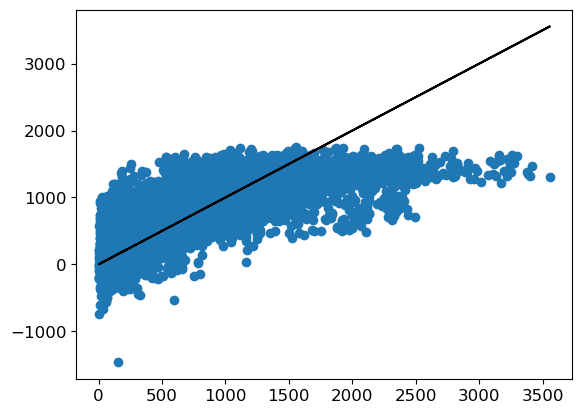

In [15]:
### Your code here
plt.scatter(y_train,y_pred)
plt.plot(y_train,y_train,'k')

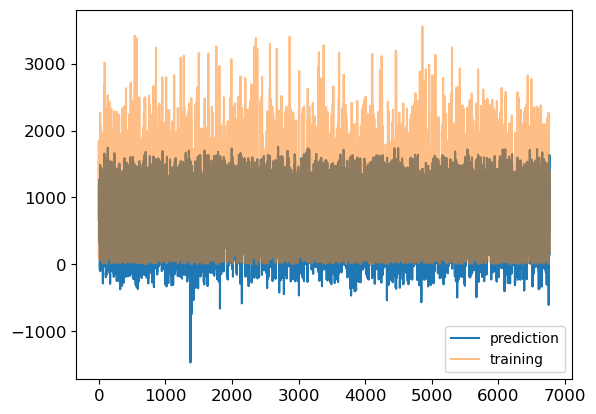

In [16]:
plt.plot(y_pred,label='prediction')
plt.plot(y_train.values,label='training',alpha=0.5)
plt.legend()
plt.show()

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

RMSE training with prediction: 852.15
RMSE training with mean: 646.17


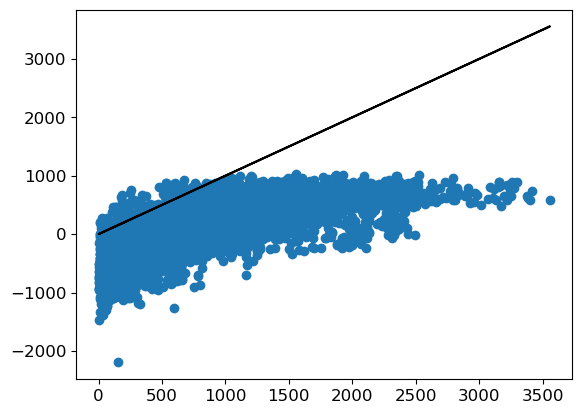

In [17]:
### Your code here
kernel_ridge_regression_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
    ,('std_scaler',StandardScaler())
    ,('kernel_ridge', KernelRidge())
])

kernel_ridge_regression_pipe.fit(x_train,y_train)

y_pred = kernel_ridge_regression_pipe.predict(x_train)
print("RMSE training with prediction: %.2f" % mean_squared_error(y_train, y_pred, squared=False))
print("RMSE training with mean: %.2f" % mean_squared_error(y_train, mean_y_train_array, squared=False))

plt.scatter(y_train,y_pred)
plt.plot(y_train,y_train,'k')

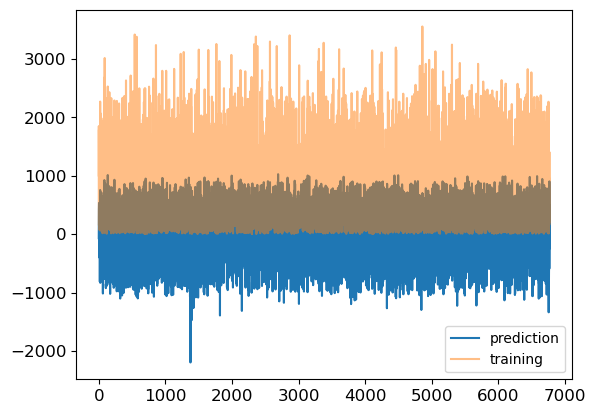

In [21]:
plt.plot(y_pred,label='prediction')
plt.plot(y_train.values,label='training',alpha=0.5)
plt.legend()
plt.show()

The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

RMSE training with prediction: 532.71
RMSE training with mean: 646.17


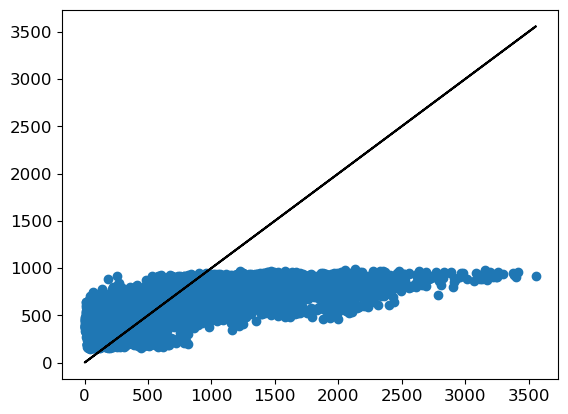

In [18]:
### Your code here
support_vector_regression_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
    ,('std_scaler',StandardScaler())
    ,('svr', SVR())
])

# fitting the pipeline
support_vector_regression_pipe.fit(x_train,y_train)

# calculating the rmse
y_pred = support_vector_regression_pipe.predict(x_train)
print("RMSE training with prediction: %.2f" % mean_squared_error(y_train, y_pred, squared=False))
print("RMSE training with mean: %.2f" % mean_squared_error(y_train, mean_y_train_array, squared=False))

# plotting the fit
plt.scatter(y_train,y_pred)
plt.plot(y_train,y_train,'k')

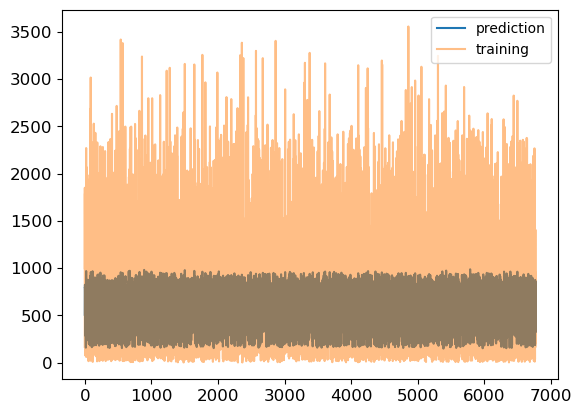

In [23]:
plt.plot(y_pred,label='prediction')
plt.plot(y_train.values,label='training',alpha=0.5)
plt.legend()
plt.show()

## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [19]:
### Your code here
kfy = KFold(n_splits=10)

pipelines = [linear_regression_pipe,kernel_ridge_regression_pipe,support_vector_regression_pipe]

test_fold_index = 0

rmse_store = {
    'training_rmse': {
            'linear_regression': np.array([])
            ,'kernel_ridge': np.array([])
            ,'support_vector': np.array([])
        }
    ,
    'validation_rmse':{
            'linear_regression': np.array([])
            ,'kernel_ridge': np.array([])
            ,'support_vector': np.array([])
        }
}

for train_index, test_index in kfy.split(x_train,y_train):
    x_train_cv, x_test_cv = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    test_fold_index += 1
    print("Test fold: {} ".format(test_fold_index))

    for index,_pipe in enumerate(pipelines):

        current_pipe_name = list(rmse_store['training_rmse'].keys())[index]

        # calculating the mean of the training targets
        mean_y_train = np.mean(y_train_cv)

        # creating an array of the same value and shaping as the training targets
        mean_y_train_array = np.full(y_train_cv.shape, mean_y_train)

        _pipe.fit(x_train_cv,y_train_cv)
        y_pred = _pipe.predict(x_test_cv)
        y_pred_train = _pipe.predict(x_train_cv)


        print("test set RMSE: {rmse} of {name}"
            .format(rmse=mean_squared_error(y_train_cv, y_pred_train, squared=False),
                    name = current_pipe_name
                    )
              )


        # the rmse for the training error (comparing the true training set targets with the training set predictions from the trained model)
        rmse_store['training_rmse'][current_pipe_name] = np.append(
            rmse_store['training_rmse'][current_pipe_name],
            mean_squared_error(y_train_cv, y_pred_train, squared=False)
        )

        #  rmse for the validation error (comparing true validation set targets with the validation set predictions from the trained model)
        rmse_store['validation_rmse'][current_pipe_name] = np.append(
            rmse_store['validation_rmse'][current_pipe_name],
            mean_squared_error(y_test_cv, y_pred, squared=False)
        )

Test fold: 1 
test set RMSE: 437.64379507964594 of linear_regression
test set RMSE: 853.0859828078835 of kernel_ridge
test set RMSE: 540.536979172284 of support_vector
Test fold: 2 
test set RMSE: 436.59199395866943 of linear_regression
test set RMSE: 851.0470040269153 of kernel_ridge
test set RMSE: 539.21114025071 of support_vector
Test fold: 3 
test set RMSE: 436.77004471444303 of linear_regression
test set RMSE: 851.8655681509897 of kernel_ridge
test set RMSE: 541.4588268983032 of support_vector
Test fold: 4 
test set RMSE: 434.00796718590647 of linear_regression
test set RMSE: 848.9616581016174 of kernel_ridge
test set RMSE: 538.9264828536299 of support_vector
Test fold: 5 
test set RMSE: 436.8252126737388 of linear_regression
test set RMSE: 851.0333590042735 of kernel_ridge
test set RMSE: 540.7534429958954 of support_vector
Test fold: 6 
test set RMSE: 439.3275644966025 of linear_regression
test set RMSE: 855.3943254259301 of kernel_ridge
test set RMSE: 543.7004692431681 of suppor

In [20]:
for index, _pipe in enumerate(pipelines):
    current_pipe_name = list(rmse_store['training_rmse'].keys())[index]

    training_mean = np.mean(rmse_store['training_rmse'][current_pipe_name])
    training_std = np.std(rmse_store['training_rmse'][current_pipe_name])
    validation_mean = np.mean(rmse_store['validation_rmse'][current_pipe_name])
    validation_std = np.std(rmse_store['validation_rmse'][current_pipe_name])

    print("Mean of {} rmse: {} for training set".format(current_pipe_name, training_mean))
    print("Std of {} rmse: {} for training set".format(current_pipe_name, training_std))
    print("Mean of {} rmse: {} for validation set".format(current_pipe_name, validation_mean))
    print("Std of {} rmse: {} for validation set".format(current_pipe_name, validation_std))
    print('\n')

Mean of linear_regression rmse: 437.22209397701334 for training set
Std of linear_regression rmse: 1.72358221905455 for training set
Mean of linear_regression rmse: 438.40718688046053 for validation set
Std of linear_regression rmse: 15.510347326753848 for validation set


Mean of kernel_ridge rmse: 852.1128058731077 for training set
Std of kernel_ridge rmse: 2.0656898569090156 for training set
Mean of kernel_ridge rmse: 852.8602702727061 for validation set
Std of kernel_ridge rmse: 16.828751348211316 for validation set


Mean of support_vector rmse: 540.7983345446562 for training set
Std of support_vector rmse: 2.0633488007479075 for training set
Mean of support_vector rmse: 540.8191958065954 for validation set
Std of support_vector rmse: 20.27457609937192 for validation set




On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

In [ ]:
### Your answer here
#According to the statistics, all three models with default parameters demonstrate significant training errors that surpass the target feature. This indicates that these models are under-fitting. Among them, linear regression performs relatively better with the smallest error. However, both linear regression and kernel ridge regression generate impractical negative predictions. In practical scenarios, support vector regression is recommended as it reduces negative predictions and is considered a more favorable option.

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [21]:
### Your code here
print("shape of X_train: {shape}".format(shape = x_train.shape))
print("shape of y_train: {shape}".format(shape = y_train.shape))
print("shape of X_test: {shape}".format(shape = x_test.shape))
print("shape of y_test: {shape}".format(shape = y_test.shape))

shape of X_train: (6772, 15)
shape of y_train: (6772,)
shape of X_test: (1693, 15)
shape of y_test: (1693,)


In [22]:
svc_grid_search_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
    ,('std_scaler',StandardScaler())
    ,('svr', SVR())
])

param_grid = {'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 6750]}

grid_search = GridSearchCV(svc_grid_search_pipe, param_grid, cv=10, scoring='neg_root_mean_squared_error', error_score='raise', n_jobs=-1)

grid_search.fit(x_train,y_train)

print(grid_search.best_params_,-grid_search.best_score_)
grid_search.cv_results_['rmse_test_score'] = -grid_search.cv_results_['mean_test_score']
print(pd.DataFrame(grid_search.cv_results_)[['params','rmse_test_score','std_test_score']])

{'svr__C': 6750} 268.68869390042994
              params  rmse_test_score  std_test_score
0  {'svr__C': 0.001}       672.727694       20.732471
1   {'svr__C': 0.01}       670.804058       20.734785
2    {'svr__C': 0.1}       653.324163       20.859459
3      {'svr__C': 1}       540.819196       20.274576
4     {'svr__C': 10}       397.824686       15.008801
5    {'svr__C': 100}       336.840570       10.478326
6   {'svr__C': 1000}       299.402052        8.230148
7   {'svr__C': 6750}       268.688694        9.556662


**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

In [23]:
### Your answers here
Comparing the performance of Support Vector Regression (SVR) before and after hyperparameter tuning, the cross-validation results reveal the following errors for both the validation and testing sets:

Mean RMSE of support_vector: 540.7983345446562 for the training set
Standard deviation of support_vector RMSE: 2.0633488007479324 for the training set
Mean RMSE of support_vector: 540.8191958065954 for the validation set
Standard deviation of support_vector RMSE: 20.27457609937192 for the validation set
Initially, when utilizing the SVR model with default parameters, the mean RMSE validation error is 540.798334544656, which is approximately 50% of the rented bike count. This error can be considered relatively high for the validation set. However, after fine-tuning the parameters through grid search, the validation error decreases to the mean RMSE of the test set error (250.54163734876053). This value is significantly lower than the median of the target data feature and closer to the first quartile, indicating a relatively low error. Consequently, it can be concluded that the SVR model is neither over-fitting nor under-fitting.


SyntaxError: invalid syntax (2671426453.py, line 2)